In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sb
import scipy.stats as sts
import matplotlib.pyplot as plt

sb.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

df = pd.read_csv('../Datasets/Index2018.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


### Transforming the 'Date' field
1. Converting object to Datetime
2. Setting Date as value index

In [2]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

df.set_index('date', inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Visualizating Data
- Coparing S&P 500 and FTSE 100

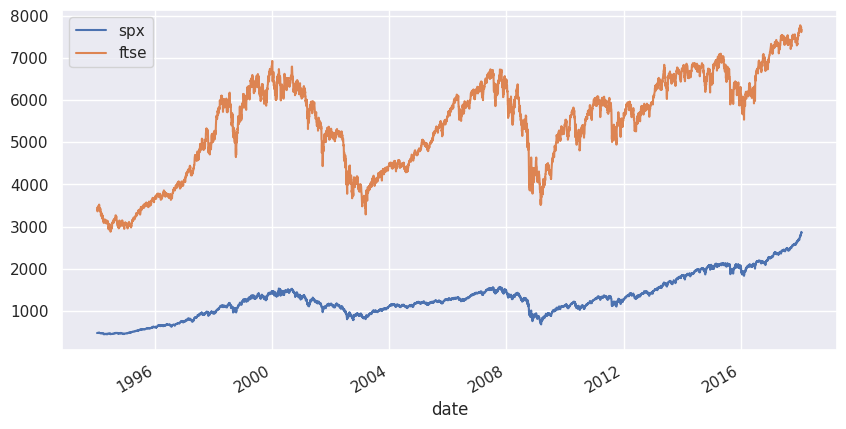

In [3]:
df[['spx','ftse']].plot(figsize=(10,5))
plt.show()

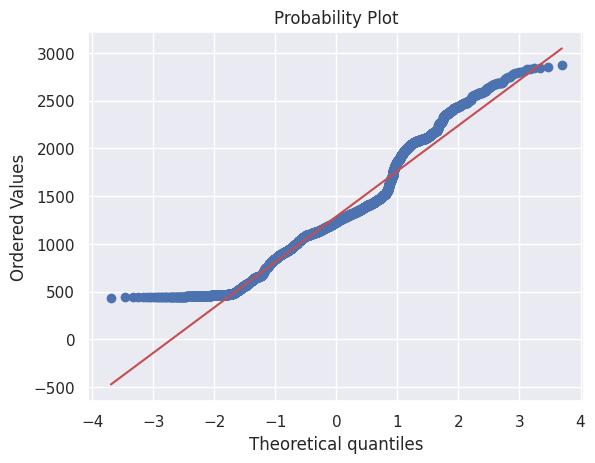

In [4]:
sts.probplot(df['spx'], plot=pl) 
pl.show() # not normaly distributeds

### Splitting the Data at the Desired Frequency
1. We split the data daily but only for business days, avoiding weekends and holidays.
2. Filling NaN or Empty Values ​​with the Average
   - Usually, for time series this is bad practice, because there are underlying time-varying patterns in the data.
   - This method is appropriate when the data varies greatly from the mean from start to finish.
   - In case I'm using a moving average, this can help to capture trends and smooth out fluctuations in the data.

In [5]:
df = df.asfreq('b')
df.isna().sum()
for col in df.columns:
    df[col] = df[col].fillna(
        df[col].rolling(2, min_periods=1).mean()
    )

In [13]:
sp500 = df['spx'].to_frame()
sp500.to_csv('../Datasets/sp500.csv')

size = int(len(sp500) * 0.8 )

train = sp500.iloc[:size]
test = sp500.iloc[size:]